In [1]:
import pandas as pd
import numpy as np
from numpy.linalg import pinv, inv, det
import matplotlib.pyplot as plt
import sys

# Input-Output Planning 

### INDEX:
- Introduction: Gross representation and technical representation of input/output matrix
- Example with a toy model
- Input-Output: Simulation of economy 
- Example 1: Produce with stored reserves along few cycles
- Example 2.1: Optimzation of input resources to maximize excess of one resource
- Example 2.2 Simulation with recursive optimization


### Introduction
### Gross representation

The following table represents economical inputs and outputs. Rows are the inputs and colums the outputs. 

| Input\Output | Sector 1 | Sector 2 | Sector 3 | Final demand | Total Output |
| ---         | ---      |  ---     | ---      | ---   | --- |
| Sector 1    | $p_{11}$ | $p_{12}$ | $p_{13}$ | $d_1$ | $X_1$ |
| Sector 2    | $p_{21}$ | $p_{22}$ | $p_{23}$ | $d_2$ | $X_2$ |
| Sector 3    | $p_{31}$ | $p_{32}$ | $p_{33}$ | $d_3$ | $X_3$ |
| Total input | $Xin_1$ | $Xin_2$  | $Xin_3$  |

Where $p_{ij}$ represents the products $i$ to produce $j$

Final demand $d_i$ (or external production) represents the excess of production for each sector.

Total input is = $ Xin_i=\sum_{i}p_{ij}$

Total production is: $ X_i=\sum_{j}p_{ij} + d_i$

### Technical representation

| Input\Output | Sector 1 | Sector 2 | Sector 3 | 
| ---         | ---      |  ---     | ---      | 
| Sector 1    | $a_{11}$ | $a_{12}$ | $a_{13}$ | 
| Sector 2    | $a_{21}$ | $a_{22}$ | $a_{23}$ | 
| Sector 3    | $a_{31}$ | $a_{32}$ | $a_{33}$ | 


Where $a_{ij}$ are the technical coefficients and represents the units of $i$ to produce $j$ 

Technological matrix is: $  \textbf{A} = \begin{pmatrix} p_{11} & p_{12} & p_{13} \\ p_{21} & p_{22} & p_{23} \\ p_{13} & p_{23} & p_{33} \end{pmatrix} \begin{pmatrix} X_1 & 0 & 0 \\ 0 & X_2 & 0 \\ 0 & 0 & X_3 \end{pmatrix}^{-1} = \begin{pmatrix} p_{11} & p_{12} & p_{13} \\ p_{21} & p_{22} & p_{23} \\ p_{13} & p_{23} & p_{33} \end{pmatrix} \begin{pmatrix} \frac{1}{X_1} & 0 & 0 \\ 0 & \frac{1}{X_2} & 0 \\ 0 & 0 & \frac{1}{X_3} \end{pmatrix} = \begin{pmatrix} \frac{p_{11}}{X_1} & \frac{p_{12}}{X_2} & \frac{p_{13}}{X_3} \\ \frac{p_{21}}{X_1} & \frac{p_{22}}{X_2} & \frac{p_{23}}{X_3} \\ \frac{p_{31}}{X_1} & \frac{p_{32}}{X_2} & \frac{p_{33}}{X_3} \end{pmatrix} = \begin{pmatrix} a_{11} & a_{12} & a_{13} \\ a_{21} & a_{22} & a_{23} \\ a_{13} & a_{23} & a_{33} \end{pmatrix} $

One application of this table is to calculate the total production $X$  of each sector in order to reach the objetive final demand (or excess) $d$:

Like total production is:  
$$ X_i=\sum_{j}p_{ij} + d_i$$
$$ X_i=\sum_{j}a_{ij}X_i + d_i$$

$$X = \begin{pmatrix} X_1 \\ X_2 \\ X_3 \end{pmatrix} = \begin{pmatrix} \frac{p_{11}}{X_1} & \frac{p_{12}}{X_2} & \frac{p_{13}}{X_3} \\ \frac{p_{21}}{X_1} & \frac{p_{22}}{X_2} & \frac{p_{23}}{X_3} \\ \frac{p_{31}}{X_1} & \frac{p_{32}}{X_2} & \frac{p_{33}}{X_3} \end{pmatrix}\begin{pmatrix} X_1 \\ X_2 \\ X_3 \end{pmatrix}  + \begin{pmatrix} d_1 \\ d_2 \\ d_3 \end{pmatrix} = \begin{pmatrix} a_{11} & a_{12} & a_{13} \\ a_{21} & a_{22} & a_{23} \\ a_{13} & a_{23} & a_{33} \end{pmatrix}\begin{pmatrix} X_1 \\ X_2 \\ X_3 \end{pmatrix} + \begin{pmatrix} d_1 \\ d_2 \\ d_3 \end{pmatrix}= AX + d$$

$$ X-AX = d $$

$$ (I-A)X = d $$

$$ \textbf{X} = (I-A)^{-1}d $$

$\newline$
$\newline$
$\newline$

NOTE: $\textbf{I} - \textbf{A}$ also is known as Leontief matrix: $\textbf{L} = \textbf{I} - \textbf{A} = \begin{pmatrix} 1 & 0 & 0 \\ 0 & 1 & 0 \\ 0 & 0 & 1 \end{pmatrix} - \begin{pmatrix} a_{11} & a_{12} & a_{13} \\ a_{21} & a_{22} & a_{23} \\ a_{13} & a_{23} & a_{33} \end{pmatrix}$

## Example with a toy model

Our example economy has three products: wheat, wood and iron with the following I/O table:

The technical coefficients are:

| Input\Output | Wheat    | Wood     | Iron     | 
| ---          | ---      |  ---     | ---      |
| Wheat        | 0.5      | 0.25     | 0.25     |
| Wood         | 0.25     | 0.25     | 0.25     |
| Iron         | 0.25     | 0.25     | 0.5      |

And the target excess of production is 

| Sector       | d    |
| ---          | ---  | 
| Wheat        | 20   | 
| Wood         | 10   | 
| Iron         | 10   | 

The total output needed is: $$ \textbf{X} = (\textbf{I}-\textbf{A})^{-1}\textbf{d} $$



In [2]:
products = ['wheat','wood','iron']
a_io = np.array([[0.5, 0.25, 0.25],[0.25, 0.25, 0.25],[0.25, 0.25, 0.5]])
a_io_df = pd.DataFrame(a_io, columns=products, index=products)
d = np.array([20, 10, 10])
X = np.matmul(inv(np.identity(3) - a_io), (d))
X = np.round(X, 3)

print('Total production to reach the excess is:')
print('Wheat: %s, Wood: %s, Iron: %s' %(str(X[0]), str(X[1]), str(X[2])))

Total production to reach the excess is:
Wheat: 226.667, Wood: 160.0, Iron: 213.333


# Input-Output: Simulation of economy 

### Technical representation

| Input\Output | Sector 1 | Sector 2 | Sector 3 | Final demand | Total Output |
| ---         | ---      |  ---     | ---      | ---   | --- |
| Sector 1    | $a_{11}$ | $a_{12}$ | $a_{13}$ | $d_1$ | $X_1$ |
| Sector 2    | $a_{21}$ | $a_{22}$ | $a_{23}$ | $d_2$ | $X_2$ |
| Sector 3    | $a_{31}$ | $a_{32}$ | $a_{33}$ | $d_3$ | $X_3$ |
| Total input | $Xin_1$ | $Xin_2$  | $Xin_3$  |


Where $a_{ij}$ are the technical coefficients and represents the units of $i$ to produce $j$ 

Technological matrix is: $  \textbf{A} = \begin{pmatrix} a_{11} & a_{12} & a_{13} \\ a_{21} & a_{22} & a_{23} \\ a_{13} & a_{23} & a_{33} \end{pmatrix} $, total production is $  \textbf{X} = \begin{pmatrix} X_{1} \\ X_{2} \\ X_{3} \end{pmatrix} $ and excess is $  \textbf{d} = \begin{pmatrix} d_{1} \\ d_{2} \\ d_{3} \end{pmatrix} $

Like total production is:  
$$ X_i=\sum_{j}a_{ij}X_i + d_i$$

$$X = \begin{pmatrix} X_1 \\ X_2 \\ X_3 \end{pmatrix} = \begin{pmatrix} a_{11} & a_{12} & a_{13} \\ a_{21} & a_{22} & a_{23} \\ a_{13} & a_{23} & a_{33} \end{pmatrix}\begin{pmatrix} X_1 \\ X_2 \\ X_3 \end{pmatrix} + \begin{pmatrix} d_1 \\ d_2 \\ d_3 \end{pmatrix}= AX + d$$


$$ \textbf{d} = \textbf{X}-\textbf{AX} = (\textbf{I}-\textbf{A})\textbf{X} $$

In N cicles with constant $A$:

$$ \textbf{d_N} = \textbf{X}_{N-1}-\textbf{AX}_{N-1} = (\textbf{I}-\textbf{A})\textbf{X}_{N-1} =  (\textbf{I}-\textbf{A})^2 \textbf{X}_{N-2} = ... =   (\textbf{I}-\textbf{A})^N \textbf{X}_{0}$$

### Example 1: Produce with stored reserves along few cycles

This toy model has an store with the inital resources to start production. 

Along n cycles:

1- Fix quantity of resources to produce. In this case the input is determined with a factor applied over the current state of the store. During this phase it is necessary check if there are enough resources to start production. 
- $ Xin_j = \beta_j S_j$, where $Xin_j$ is input resources for each sector $j$, $\beta_j$ is the ratio of stored resources to be used as input and $S_j$ is the stored resource. So $ Xin = \beta \circ S$ with $ \circ $ the hadamard product.
- The input of each sector must be $ Xin_j \leq S_j$, where $a_{ij}$ are the technical coefficients.

2- Withdraw resources in stores: $S_j[n] = S_j[n-1] - Xin_j[n] $

3- Determine $\textbf{X}$: like $ Xin_j=\sum_{i}a_{ij}X_j \xrightarrow{} \textbf{Xin}^T = \textbf{X}^T\textbf{A} \xrightarrow{} \textbf{X}^T = \textbf{Xin}^T\textbf{A}^{-1} $  

4- Produce and store $d$ excess:
$ \textbf{d} = \textbf{X}-\textbf{AX} = (\textbf{I}-\textbf{A})\textbf{X} $ or like $\textbf{X} = \textbf{Xp} + \textbf{d} \xrightarrow{} \textbf{d} = \textbf{X} - \textbf{Xp} $, where $\textbf{Xp}$ used in production is $\textbf{Xp}=\textbf{AX}$


Technical matrix
      X1    X2    X3
X1  0.40  0.03  0.02
X2  0.06  0.37  0.10
X3  0.12  0.15  0.19



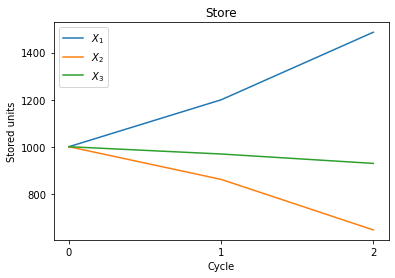

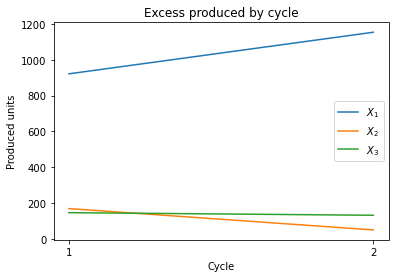

In [3]:
########### INPUT
# Technical matrix
a_io = np.array([[0.4, 0.03, 0.02],[0.06, 0.37, 0.1],[0.12, 0.15, 0.19]])
# Stored reserves
S = np.array([[1000], [1000], [1000]])
# beta coefficients
b = np.array([[0.72182638], [0.30855825] , [0.17805353]])
# Number of iterations
cycles = 2

########### PRINT INPUT

print('Technical matrix')
a_io_df = pd.DataFrame(a_io, columns=['X1', 'X2', 'X3'], index=['X1', 'X2', 'X3'] )
print(a_io_df)
print('')

########### SIMULATION

# Historical values to plot the evolution of stored reserves and excess produced
S_hist = np.reshape(S,(-1,3))
d_hist = np.array([[1000, 1000, 1000]])

for cycle in range(1,cycles + 1):
    
    X_in = np.multiply(b,S)
    S = S - X_in
    if(S<0).any():
        sys.exit('Warning: Cannot continue with producion S. Cycle = %s' %(cycle))
    X_T = np.matmul(np.transpose(X_in), pinv(a_io))
    X = np.transpose(X_T)
    Xp= np.matmul(a_io, X)
    if(X<0).any():
        sys.exit('Warning: Cannot continue with producion X. Cycle = %s' %(cycle))
    d = X - Xp
    d_hist = np.append(d_hist, np.reshape(d,(-1,3)), axis=0)
    S = S + d
    if(S<0).any() or (d<0).any():
        sys.exit('Warning: Cannot continue with producion S/D. Cycle = %s' %(cycle))
    S_hist = np.append(S_hist, np.reshape(S,(-1,3)), axis=0)

########### PLOT

labels = ['$X_1$', '$X_2$', '$X_3$']
x = np.arange(0,len(S_hist))
for y, label in zip(np.transpose(S_hist), labels):
    plt.plot(x, y, label=label)
plt.xticks(x)
plt.xlabel('Cycle')
plt.ylabel('Stored units')
plt.title('Store')
plt.legend()
plt.show()

for y, label in zip(np.transpose(d_hist[1:]), labels):
    plt.plot(x[1:], y, label=label)
plt.xticks(x[1:])
plt.ylabel('Produced units')
plt.xlabel('Cycle')
plt.title('Excess produced by cycle')
plt.legend()
plt.show()

### Example 2.1: Optimzation of input resources to maximize excess of one resource

Optimize $\beta$ values that maximizes excess of $d_1$ resource. $\textbf{d}$.

The problem requires the following constrains:
- Take less or equal units of each resource from the store to start production $$ \textbf{Xin} \leq \textbf{S} $$
- Total production must be greater than 0 for each resource $$ \textbf{X} \geq 0 $$
- Excess of production must be greater than 0 for each resource $$ \textbf{d} \geq 0 $$

$$ \space \space \max_{\textbf{d}} d_1 $$
$$ Xin_1 \leq S_1 $$
$$ Xin_2 \leq S_2 $$
$$ Xin_3 \leq S_3 $$
$$ X_1 \geq 0 $$
$$ X_2 \geq 0 $$
$$ X_3 \geq 0 $$
$$ d_1 \geq 0 $$
$$ d_2 \geq 0 $$
$$ d_3 \geq 0 $$

To implement the objetive function $d$ is defined as:
$$ \textbf{d} = \textbf{X} - \textbf{AX} = (\textbf{I}-\textbf{A})\textbf{X} = (\textbf{I}-\textbf{A})(\textbf{Xin}^T\textbf{A}^{-1})^T = (\textbf{I}-\textbf{A})(( \beta \circ \textbf{S})^T\textbf{A}^{-1})^T $$
Where $ \circ $ is the hadamard product.

In [4]:
from scipy.optimize import minimize

In [5]:
# Technical matrix
a_io = np.array([[0.4, 0.03, 0.02],[0.06, 0.37, 0.1],[0.12, 0.15, 0.19]])

# Stored reserves
S = np.array([[1000], [1000], [1000]])

In [6]:
def calc_d(b, S, a_io): 
    """
    Calculates d excess vector 
    Arguments:
        b: an np.array beta coefficients nx1
        a_io: np.array technical matrix nxn
        S: np.array with the reserves in store nx1
    Returns:
        d excess vector nx1
    """
    dim = a_io.shape[0]
    a = (np.identity(dim) - a_io)
    bb = np.multiply(b.reshape([dim,-1]),S)
    c = np.matmul(np.transpose(bb), pinv(a_io))
    d = np.matmul(a,np.transpose(c)) 
    return d

def calc_xin(b, S): 
    """
    Calculates X_in values according beta coefficients and stored reserves 
    Arguments:
        b: an np.array beta coefficients nx1
        S: np.array with the reserves in store nx1
    Returns:
        xin input vector nx1
    """
    bb = np.multiply(b,S)
    return bb

def calc_x(b, S, a_io):
    """
    Calculates X values according beta coefficients and stored reserves and technical matrix
    Arguments:
        b: an np.array beta coefficients nx1
        S: np.array with the reserves in store nx1
        a_io: np.array technical matrix nxn
    Returns:
        x total production vector nx1
    """
    bb = np.multiply(b,S)
    X = np.matmul(np.transpose(bb), pinv(a_io))
    return np.transpose(X)

In [7]:
def obj_max_func_b1(b, S, a_io): 
    """
    Objetive function, maximize d_1 (remind use '-' because optimizer function in scipy is minimize)
    Arguments:
        b: an np.array beta coefficients nx1
        S: np.array with the reserves in store nx1
        a_io: np.array technical matrix nxn
    Returns:
        -d_1 value
    """
    dim = a_io.shape[0]
    a = (np.identity(dim) - a_io)
    bb = np.multiply(b.reshape([dim,-1]),S)
    c = np.matmul(np.transpose(bb), pinv(a_io))
    d = np.matmul(a,np.transpose(c))
    return -d[0].item() #Like is maximized remind - sign

Constrains and bounds

In [8]:
cons = [{'type': 'ineq', 'fun': lambda x: -calc_xin(x,S)[0] + 1000},
        {'type': 'ineq', 'fun': lambda x: -calc_xin(x,S)[1] + 1000},
        {'type': 'ineq', 'fun': lambda x: -calc_xin(x,S)[2] + 1000},
        {'type': 'ineq', 'fun': lambda x: calc_d(x, S, a_io)[0] - 0.15},
        {'type': 'ineq', 'fun': lambda x: calc_d(x, S, a_io)[1] - 0.15},
        {'type': 'ineq', 'fun': lambda x: calc_d(x, S, a_io)[2] - 0.15},
        {'type': 'ineq', 'fun': lambda x: calc_x(b, S, a_io)[0] - 0.1},
        {'type': 'ineq', 'fun': lambda x: calc_x(b, S, a_io)[1] - 0.1},
        {'type': 'ineq', 'fun': lambda x: calc_x(b, S, a_io)[2] - 0.1}]

bounds = [(0, 1) for n in range(0,a_io.shape[0])]

options={'eps': 1.4901161193847656e-09, 'maxiter' : 100}

Apply optimizer

In [9]:
res = minimize(
    obj_max_func_b1,
    x0=np.array([0,0,0]),
    args=(S, a_io),
    constraints=cons,
    bounds=bounds,
    method = 'SLSQP',
    options = options
)
res

     fun: -1385.7614824475113
     jac: array([-1556.18283814,    50.02349872,  1048.62335596])
 message: 'Positive directional derivative for linesearch'
    nfev: 16
     nit: 8
    njev: 4
  status: 8
 success: False
       x: array([0.99999975, 0.23594143, 0.15126352])

Use the result in the simulation:

Technical matrix
      X1    X2    X3
X1  0.40  0.03  0.02
X2  0.06  0.37  0.10
X3  0.12  0.15  0.19



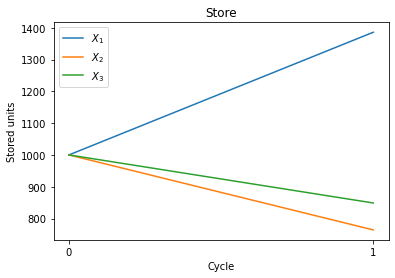

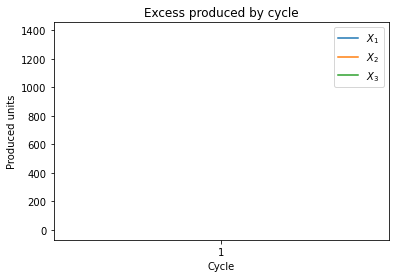

In [10]:
########### INPUT
# Technical matrix
a_io = np.array([[0.4, 0.03, 0.02],[0.06, 0.37, 0.1],[0.12, 0.15, 0.19]])
# Stored reserves
S = np.array([[1000], [1000], [1000]])
# beta coefficients from the result
dim = a_io.shape[0]
b = res.x.reshape([dim,-1])
# Number of iterations
cycles = 1

########### PRINT INPUT

print('Technical matrix')
a_io_df = pd.DataFrame(a_io, columns=['X1', 'X2', 'X3'], index=['X1', 'X2', 'X3'] )
print(a_io_df)
print('')

########### SIMULATION

# Historical values to plot the evolution of stored reserves and excess produced
S_hist = np.reshape(S,(-1,3))
d_hist = np.array([[1000, 1000, 1000]])
for cycle in range(1,cycles + 1):
    
    X_in = np.multiply(b,S)
    S = S - X_in
    if(S<0).any():
        sys.exit('Warning: Cannot continue with producion S. Cycle = %s' %(cycle))
    X_T = np.matmul(np.transpose(X_in), pinv(a_io))
    X = np.transpose(X_T)
    Xp= np.matmul(a_io, X)
    if(X<0).any():
        sys.exit('Warning: Cannot continue with producion X. Cycle = %s' %(cycle))
    d = X - Xp
    d_hist = np.append(d_hist, np.reshape(d,(-1,3)), axis=0)
    S = S + d
    if(S<0).any() or (d<0).any():
        sys.exit('Warning: Cannot continue with producion S/D. Cycle = %s' %(cycle))
    S_hist = np.append(S_hist, np.reshape(S,(-1,3)), axis=0)

########### PLOT

labels = ['$X_1$', '$X_2$', '$X_3$']
x = np.arange(0,len(S_hist))
for y, label in zip(np.transpose(S_hist), labels):
    plt.plot(x, y, label=label)
plt.xticks(x)
plt.xlabel('Cycle')
plt.ylabel('Stored units')
plt.title('Store')
plt.legend()
plt.show()

for y, label in zip(np.transpose(d_hist[1:]), labels):
    plt.plot(x[1:], y, label=label)
plt.xticks(x[1:])
plt.ylabel('Produced units')
plt.xlabel('Cycle')
plt.title('Excess produced by cycle')
plt.legend()
plt.show()

### Example 2.2 Simulation with recursive optimization

In this case the optmization of $d_1$ is applied along N cycles

Technical matrix
      X1    X2    X3
X1  0.40  0.03  0.02
X2  0.06  0.37  0.10
X3  0.12  0.15  0.19

Number of cycles: 10


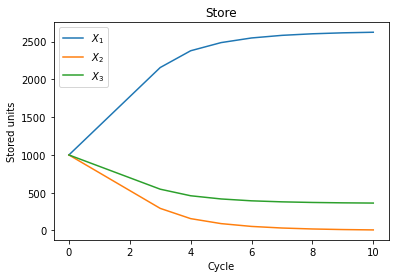

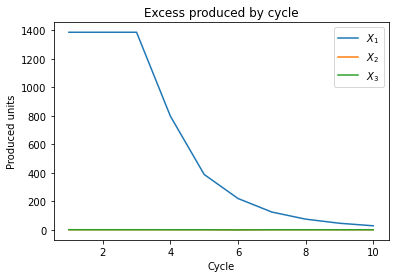

In [11]:
########### INPUT
# Technical matrix
a_io = np.array([[0.4, 0.03, 0.02],[0.06, 0.37, 0.1],[0.12, 0.15, 0.19]])
# Stored reserves
S = np.array([[1000], [1000], [1000]])
# beta coefficients from the result
# Number of iterations
cycles = 10

########### PRINT INPUT

print('Technical matrix')
a_io_df = pd.DataFrame(a_io, columns=['X1', 'X2', 'X3'], index=['X1', 'X2', 'X3'] )
print(a_io_df)
print('')

########### SIMULATION

# Historical values to plot the evolution of stored reserves and excess produced
S_hist = np.reshape(S,(-1,3))
d_hist = np.array([[1000, 1000, 1000]])
dim = a_io.shape[0]

for cycle in range(1,cycles + 1):
    
    res = minimize(
    obj_max_func_b1,
    x0=np.array([0,0,0]),
    args=(S, a_io),
    constraints=cons,
    bounds=bounds,
    method = 'SLSQP',
    options = options)

    b = res.x.reshape([dim,-1])
    
    X_in = np.multiply(b,S)
    S = S - X_in
    if(S<0).any():
        pass
        #sys.exit('Warning: Cannot continue with producion S. Cycle = %s' %(cycle))
    X_T = np.matmul(np.transpose(X_in), pinv(a_io))
    X = np.transpose(X_T)
    Xp= np.matmul(a_io, X)
    if(X<0).any():
        pass
        #sys.exit('Warning: Cannot continue with producion X. Cycle = %s' %(cycle))
    d = X - Xp
    d_hist = np.append(d_hist, np.reshape(d,(-1,3)), axis=0)
    S = S + d
    if(S<0).any() or (d<0).any():
        pass
        #sys.exit('Warning: Cannot continue with producion S/D. Cycle = %s' %(cycle))
    S_hist = np.append(S_hist, np.reshape(S,(-1,3)), axis=0)

########### PLOT

print('Number of cycles: %s' %(cycle))

labels = ['$X_1$', '$X_2$', '$X_3$']
x = np.arange(0,len(S_hist))
for y, label in zip(np.transpose(S_hist), labels):
    plt.plot(x, y, label=label)
# plt.xticks(x)
plt.xlabel('Cycle')
plt.ylabel('Stored units')
plt.title('Store')
plt.legend()
plt.show()

for y, label in zip(np.transpose(d_hist[1:]), labels):
    plt.plot(x[1:], y, label=label)
# plt.xticks(x[1:])
plt.ylabel('Produced units')
plt.xlabel('Cycle')
plt.title('Excess produced by cycle')
plt.legend()
plt.show()
